/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[ 5.  2.  2. 20.  1.]
 [ 2.  3.  2.  3.  1.]
 [ 2.  3.  2. 11.  1.]
 [ 5.  3.  2.  3.  1.]
 [ 2.  3.  2. 20.  1.]]


<Figure size 720x864 with 0 Axes>

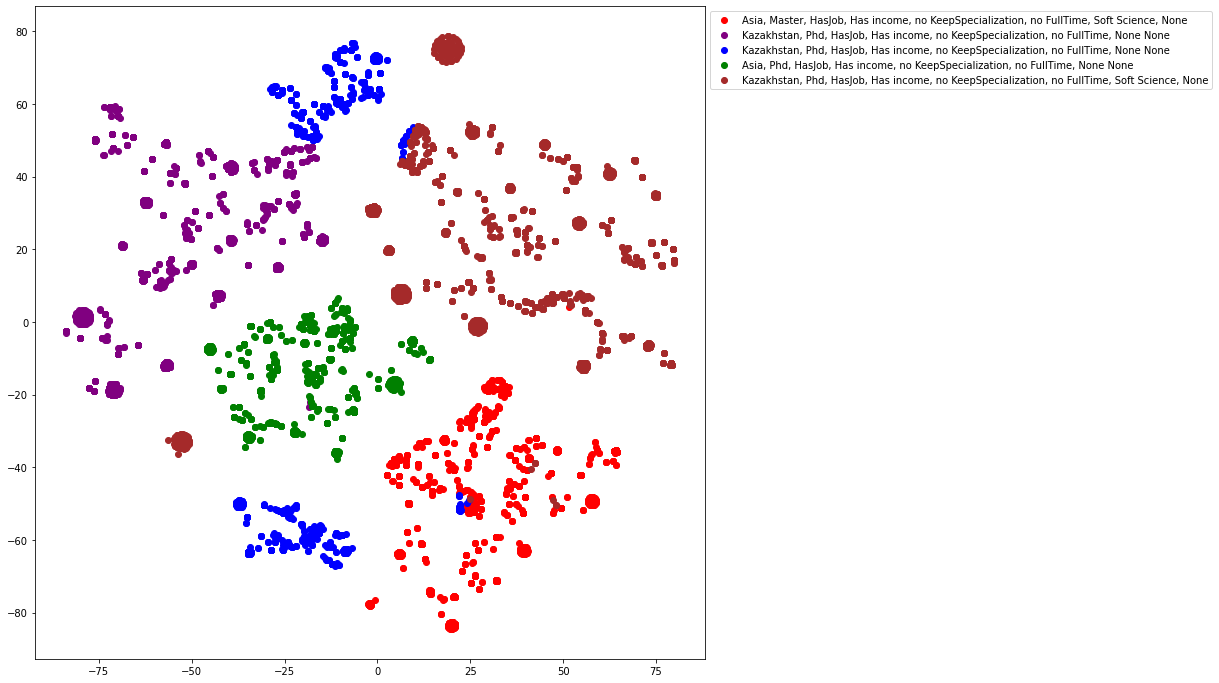

In [25]:
import pandas as pd
import numpy as np

#url = 'https://raw.githubusercontent.com/ISwifton/Clustering-of-sociological-data/main/final_20.csv'
url = 'https://raw.githubusercontent.com/ISwifton/Clustering-of-sociological-data/main/Relocations.csv'
Real_rawdata=pd.read_csv(url)
Real=Real_rawdata.to_numpy()
dim = len(Real)
Real_final=np.zeros((dim,dim))

# Compute pairwise distance matrix (Job)
for i in range(dim):
  for j in range(dim):
   Real_final[i][j]=(sum(abs(Real[i]-Real[j])))

# Make clustering
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
Real_tsne = TSNE(n_components=2, random_state=0)
Real_kmns = KMeans(n_clusters=5).fit(Real_final)

Real_2d = Real_tsne.fit_transform(Real_final)
Real_y=Real_kmns.labels_

# Make medians for each cluster
All_medians=np.zeros((5, 5))
for i in range(0, 5):
  indexes = np.where(Real_y == i)[0]
  matrix_cluster = Real[[indexes], :]
  median = np.median(matrix_cluster, axis=1)
  All_medians[i, :] = median
print(All_medians)

data = np.empty((5,5), dtype=object)

for i in range(0, 5):
  for j in range(0, 5):
    if j == 0:
      if round(All_medians[i, j]) == 2:
        data[i, j] = "Kazakhstan,"
      if round(All_medians[i, j]) == 3:
       data[i, j] = "Georgia,"
      if round(All_medians[i, j]) == 4:
       data[i, j] = "Armenia,"
      if round(All_medians[i, j]) == 5:
       data[i, j] = "Asia,"
    if j == 1:
      if round(All_medians[i, j]) == 1:
        data[i, j] = "Bachelor,"
      if round(All_medians[i, j]) == 2:
       data[i, j] = "Master,"
      if round(All_medians[i, j]) == 3:
       data[i, j] = "Phd,"
      if round(All_medians[i, j]) == 4:
       data[i, j] = "DSC,"
    if j == 2:
      if round(All_medians[i, j]) == 0:
        data[i, j] = "No job, no income, no KeepSpecialization, no FullTime,"
      if round(All_medians[i, j]) == 1:
       data[i, j] = "HasJob, no income, no KeepSpecialization, no FullTime,"
      if round(All_medians[i, j]) == 2:
       data[i, j] = "HasJob, Has income, no KeepSpecialization, no FullTime,"
      if round(All_medians[i, j]) == 3:
       data[i, j] = "HasJob, Has income, KeepSpecialization, no FullTime,"
      if round(All_medians[i, j]) == 4:
       data[i, j] = "HasJob, Has income, KeepSpecialization, FullTime,"
    if j == 3:
      if round(All_medians[i, j]) == 24:
        data[i, j] = "STEM (physicist),"
      if round(All_medians[i, j]) == 2:
       data[i, j] = "STEM (mathematician),"
      if round(All_medians[i, j]) == 20:
       data[i, j] = "Soft Science,"
      if round(All_medians[i, j]) == 18:
       data[i, j] = "Soft Science,"
      if round(All_medians[i, j]) == 13:
       data[i, j] = "Others"

#print(data)

ind = [0, 1, 2, 3, 4]
#print(str(data[0,:]))

import re
category_to_label = {i : re.sub("[\[\]\n']", "", str(data[i,:])) for i, x in enumerate(ind)}
#print(dc)

#Real_rawdata.loc[:, "5"] = list(Real_y)
new_2d = np.append(Real_2d, Real_y[:,None],1)
Real_target_ids = range(len(Real_y))

category_to_color = {0: 'red', 1: 'purple', 2:'blue', 3: 'green',  4: 'brown'}
#category_to_label = {0: 'Kazakhstan, Phd, No Job, STEM, No Income confirmation', 1:'Kazakhstan, Phd, No Job, Others, No Income confirmation', 2:'Kazakhstan, Phd, No Job, Soft Science, No Income confirmation', 3:'Armenia, Master degree, No Job, Others, No Income confirmation',  4:'Armenia, Phd, No Job, STEM, No Income confirmation'}

# plot each category with a distinct label
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 12))
fig, ax = plt.subplots(1,1, figsize=(12, 12))
for category, color in category_to_color.items():
    mask = new_2d[:, 2] == category
    ax.plot(new_2d[mask, 0], new_2d[mask, 1], 'o', 
            color=color, label=category_to_label[category])

ax.legend(loc="upper left", bbox_to_anchor=(1,1))